In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools
import shutil
from visualize_graphs import (
    without_compilation,
    advanced_plot_df,
    plot_settings_in_subplot,
)

In [2]:
from pylab import *
def colors_viridis(number_of_colors):
    cmap = cm.get_cmap('viridis', number_of_colors)    # PiYG
    colors_viridis_ = []
    for i in range(cmap.N):
        rgba = cmap(i)
        # rgb2hex accepts rgb or rgba
        colors_viridis_.append(matplotlib.colors.rgb2hex(rgba))
    return colors_viridis_


In [3]:
# group settings by hand
number = 1
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 1
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl
McForDatabase1.pkl
==========0=============
swap_only_core_qbits_in_line_swaps False
==========1=============
swap_only_core_qbits_in_line_swaps True
==========2=============
swap_probability 0.05
decay_rate_of_swap_probability 0.95
==========3=============
swap_probability 0.1
decay_rate_of_swap_probability 0.95
==========4=============
swap_probability 0.15
decay_rate_of_swap_probability 0.95
==========5=============
swap_probability 0.3
decay_rate_of_swap_probability 0.95
==========6=============
shell_time 50
envelop_shell_search True
finite_grid_size False
==========7=============
shell_time 200
envelop_shell_search True
finite_grid_size False
==========8=============
shell_time 500
envelop_shell_search True
finite_grid_size False
==========9=============
random_qbit True
==========10=============
number_of_plaquettes_weight True
random_qbit False
==========11=============
sp

In [4]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

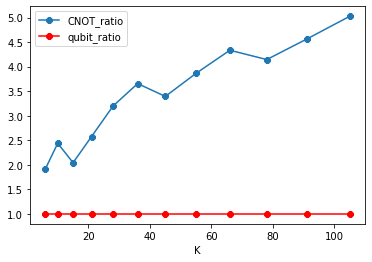

In [5]:
problem_folder = "lhz"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

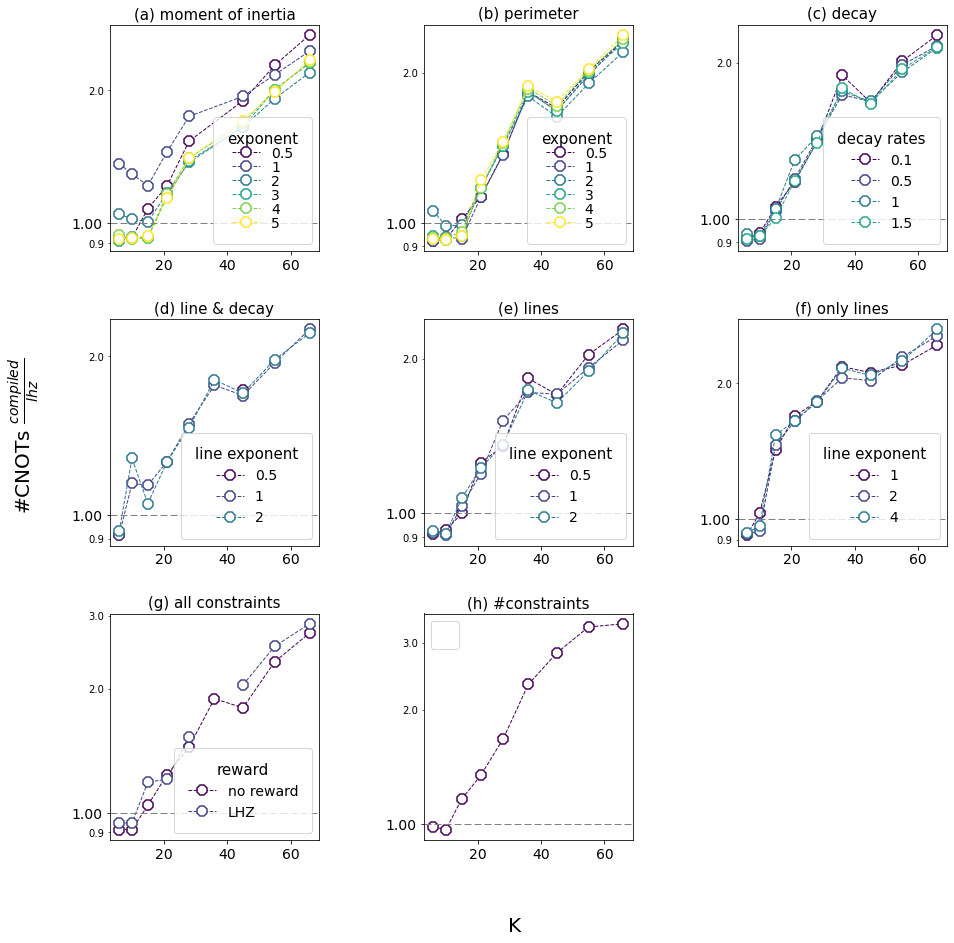

In [6]:
name = "EnergyForLHZGraphs1"
titles = [
    "(a) moment of inertia",
    "(b) perimeter",
    #     "rewards",
    "(c) decay",
    "(d) line & decay",
    "(e) lines",
    "(f) only lines",
    "(g) all constraints",
    "(h) #constraints",
]
all_setting_numbers = [
    [0, 1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10, 11],
    #     [12, 13, 14, 15],
    [16, 17, 18, 19],
    [20, 21, 22],
    [23, 24, 25],
    [26, 27, 28],
    [29, 30],
    [31],
]
all_setting_names = [
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
    #     [["no reward", "greedy", "LHZ", "initial energy"]],
    [[0.1, 0.5, 1, 1.5], "decay rates"],
    [[0.5, 1, 2], "line exponent"],
    [[0.5, 1, 2], "line exponent"],
    [[1, 2, 4], "line exponent"],
    [["no reward", "LHZ"], "reward"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)
nx, ny = 3, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df, name, titles, all_setting_numbers_and_names, x_axis, y_axis, nx, ny, color=colors_viridis(6)
)
axs[2, 2].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

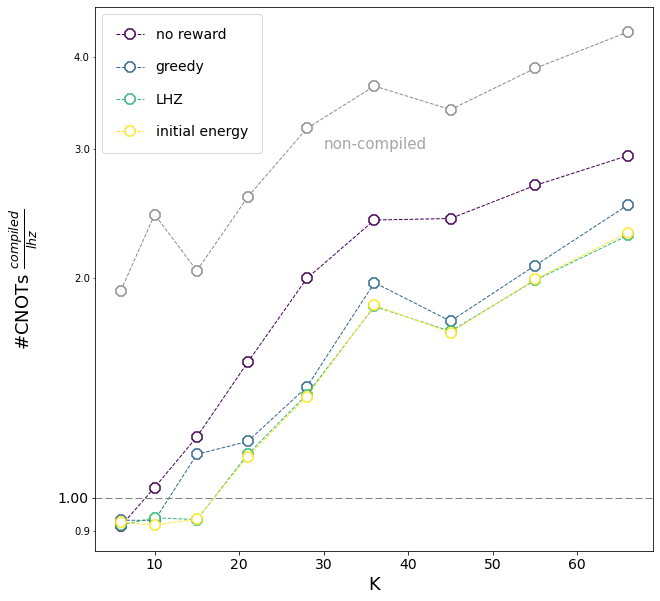

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "rewards"
legend_title = ""
setting_numbers = [12, 13, 14, 15]
setting_names = ["no reward", r"greedy", "LHZ", "initial energy"]
name = "EnergyForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(30, 3),
    color=colors_viridis(4)
)

In [8]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

df['EnergyForLHZGraphs1'] = df['EnergyForLHZGraphs1'].append({"N": 9, "K": 36, "C": 28, "CNOT_ratio":1.85, "number_of_setting":5}, ignore_index=True)
df['EnergyForLHZGraphs1'] = df['EnergyForLHZGraphs1'].append({"N": 9, "K": 36, "C": 28, "CNOT_ratio":2.15, "number_of_setting":30}, ignore_index=True)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

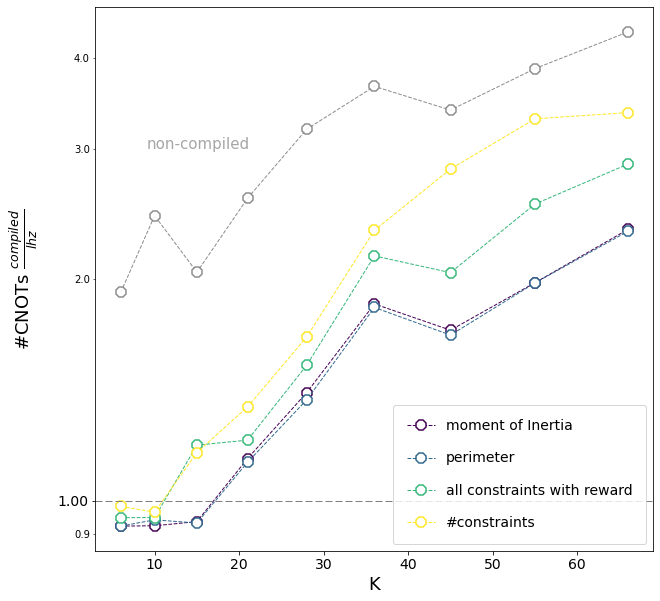

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "energy functions"
legend_title = ""
setting_numbers = [5, 7, 30, 31]  # replace 30 with 29?
setting_names = [
    "moment of Inertia",
    "perimeter",
    "all constraints with reward",
    "#constraints",
]
name = "EnergyForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(9, 3),
    color=colors_viridis(4)
)

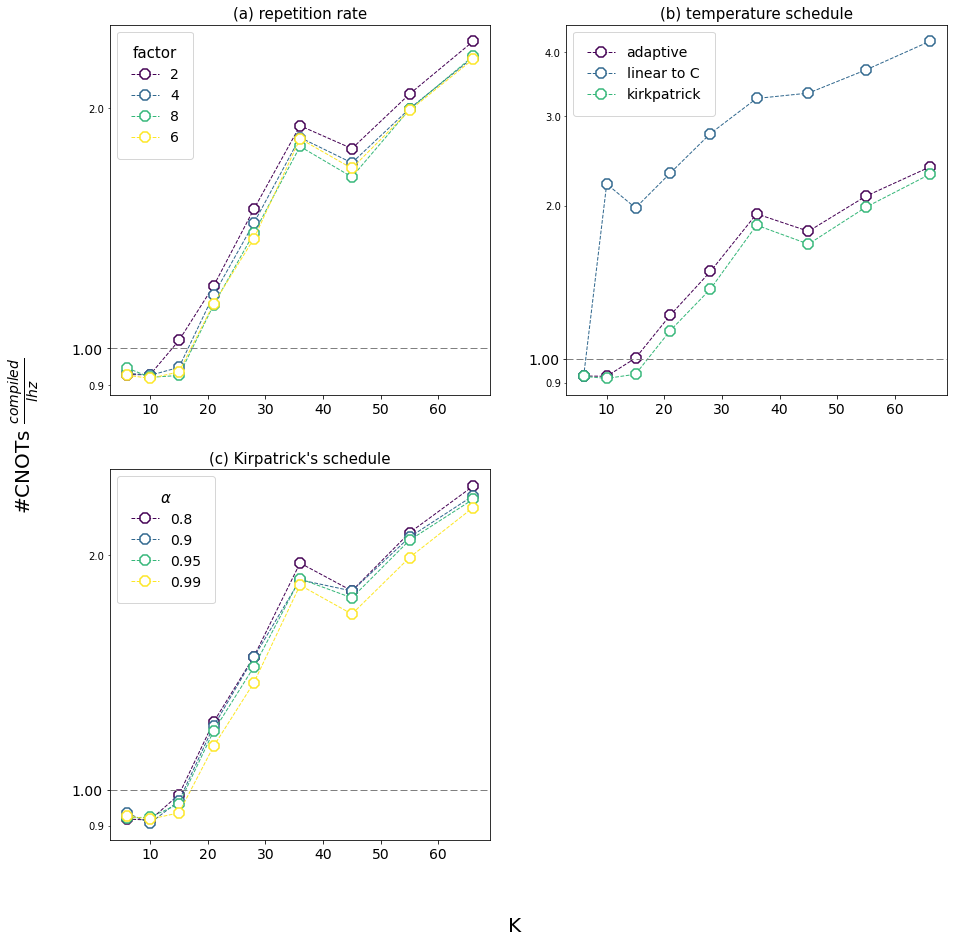

In [10]:
name = "McForLHZGraphs1"
titles = [
    "(a) repetition rate",
    "(b) temperature schedule",
    "(c) Kirpatrick's schedule",
    #    "core"
]
all_setting_numbers = [
    [0, 1, 2, 15],
    [3, 6, 15],
    [8, 9, 10, 15],
    #    [11, 15]
]
default_EnergyForLHZGraphs1 = df["EnergyForLHZGraphs1"].loc[
    df["EnergyForLHZGraphs1"]["number_of_setting"].isin([15])
]
df["McForLHZGraphs1"] = df["McForLHZGraphs1"].append(default_EnergyForLHZGraphs1)

all_setting_names = [
    [[2, 4, 8, 6], "factor"],
    [["adaptive", "linear to C", "kirkpatrick"]],
    [[0.8, 0.9, 0.95, 0.99], r"$\alpha$"],
    #    [["with core", "without core"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)
nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    wspace=0.2,
    hspace=0.2,
    color=colors_viridis(4),
    y_label_coord=(0.03, 0.5)
)
axs[1, 1].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

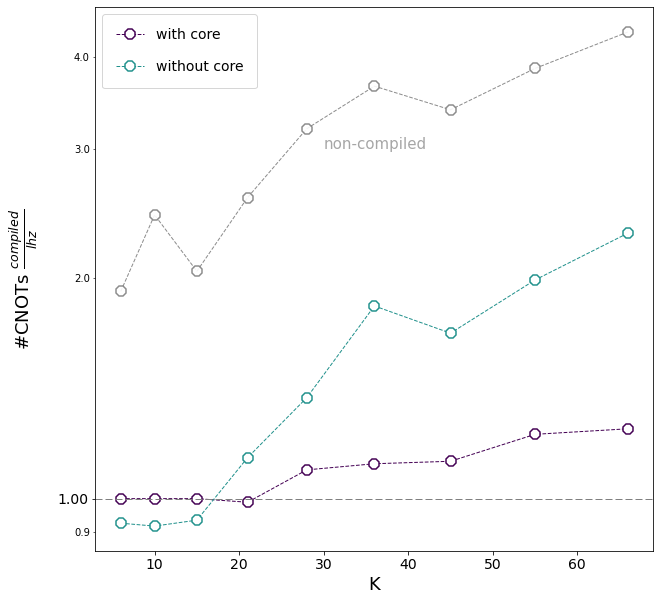

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "core"
legend_title = ""
setting_numbers = [11, 15]
setting_names = ["with core", "without core"]
name = "McForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(30, 3),
    color=colors_viridis(3),
)

In [12]:
# group settings by hand
number = 2
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 5
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 AdvancedMcForLHZGraphsWithCore2.pkl
1 CoreMcForDatabase2.pkl
2 McForDatabaseWithCore2.pkl
3 EnergyForLHZWithCore2.pkl
4 EnergyForLHZGraphs2.pkl
5 McForDatabase2.pkl
6 CoreEnergyForDatabase2.pkl
McForDatabase2.pkl
==========0=============
finite_grid_size True
envelop_shell_search False
==========1=============
shell_time 10
==========2=============
shell_time 20
==========3=============
shell_time 50
==========4=============
number_of_plaquettes_weight True
random_qbit False
==========5=============
sparse_plaquette_density_weight True
random_qbit False
==========6=============
length_of_node_weight 0.05
random_qbit False
==========7=============
qbit_with_same_node True
random_qbit False


In [13]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

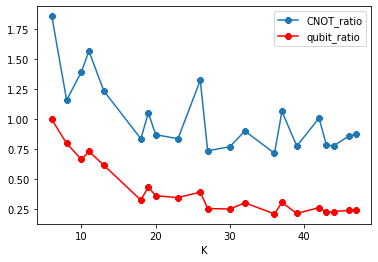

In [14]:
problem_folder = "training_set"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

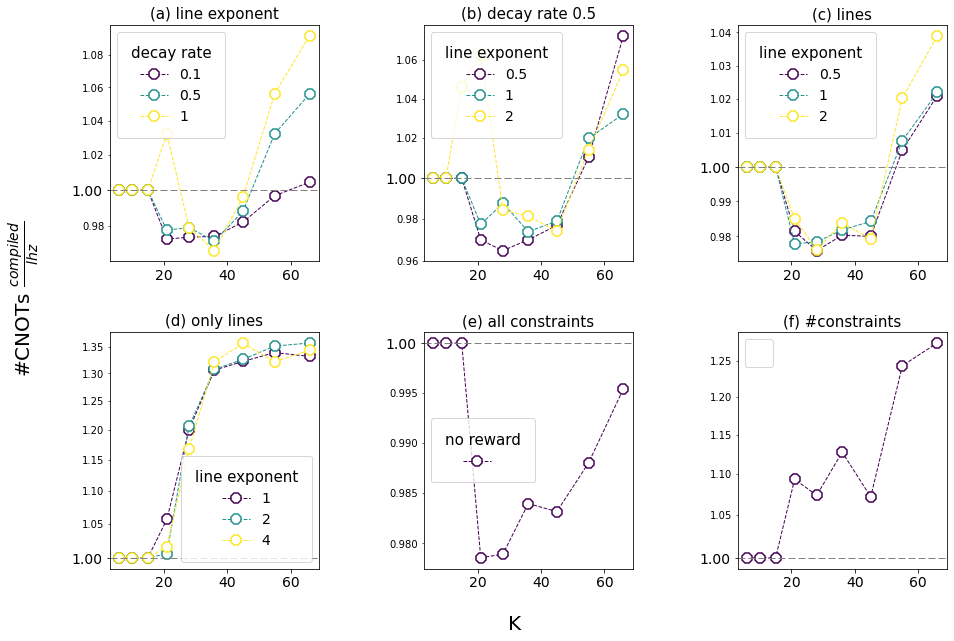

In [15]:
name = "EnergyForLHZWithCore2"
titles = [
    # "decay",
    "(a) line exponent",
    "(b) decay rate 0.5",
    "(c) lines",
    "(d) only lines",
    "(e) all constraints",
    "(f) #constraints",
]
all_setting_numbers = [
    #     [0, 1],
    [2, 3, 4],
    [5, 6, 7],
    [8, 9, 10],
    [11, 12, 13],
    [14],
    [15],
]
all_setting_names = [
    #     [[1, 1.5], "decay rate"],
    [[0.1, 0.5, 1], "decay rate"],
    [[0.5, 1, 2], "line exponent"],
    [[0.5, 1, 2], "line exponent"],
    [[1, 2, 4], "line exponent"],
    [[""], "no reward"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 10),
    color=colors_viridis(3)

)
# axs[2, 2].set_axis_off()
# axs[2, 1].set_axis_off()
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

In [16]:
# group settings by hand
results1 = []
for idx, name in enumerate(os.listdir(paths.parameters_path / f"run_1/dictionaries")):
    print(idx, name)
    results1.append(name.split(".")[0])


dff = dict()
for name in results1:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_1/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        dff.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl


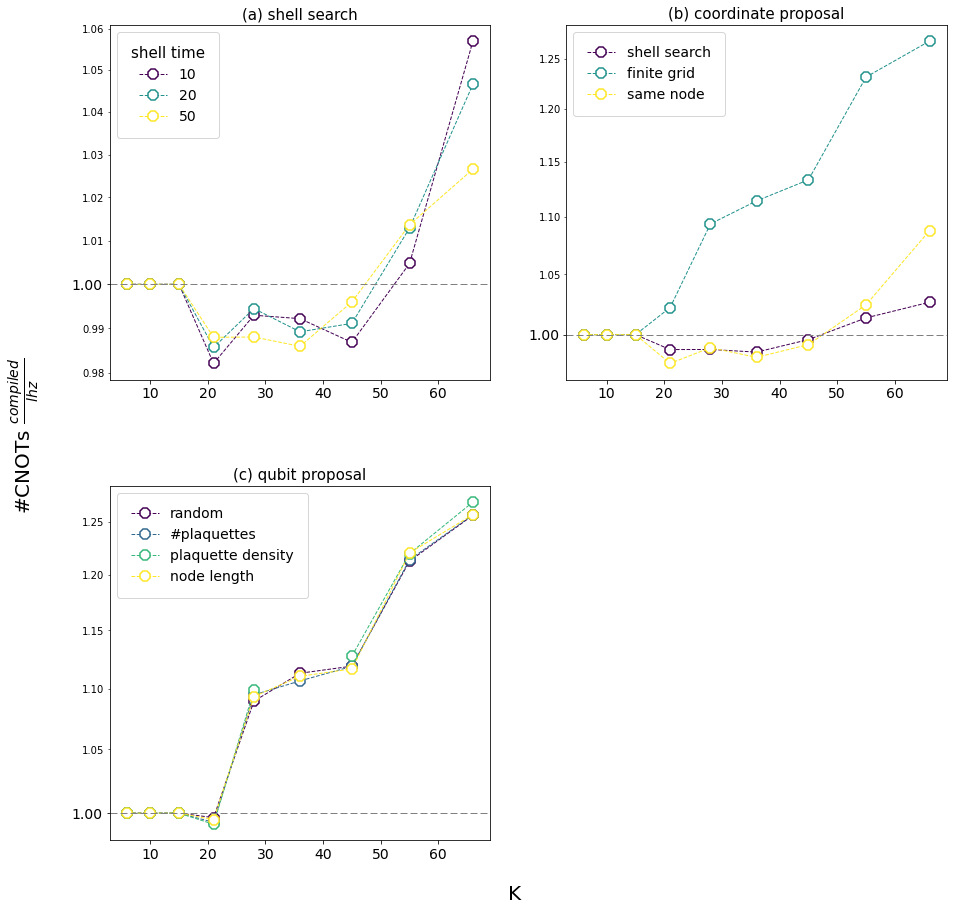

In [17]:
name = "AdvancedMcForLHZGraphsWithCore2"
titles = [
#     "swap only in core",
#     "line swaps",
#     "swap prob. decay",
    "(a) shell search",
    "(b) coordinate proposal",
]
all_setting_numbers = [
#     [0, 1],
#     [2, 3, 4, 8],
#     [4, 5],
    [6, 7, 8],
    [8, 9, 14],
    [8, 11, 12, 13, 14],
]
all_setting_names = [
#     [[False, True]],
#     [["5%", "15%", "45%", "0%"], "swap probability"],
#     [["decay", "no decay"]],
    [[10, 20, 50], "shell time"],
    [["shell search", "finite grid", "same node"]],
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 15),
    wspace=0.2,
    y_label_coord=(0.03, 0.5),
    x_label_coord=(0.5, 0.07),
    color=colors_viridis(3)

)


name = "AdvancedMcForLHZGraphsWithCore1"

titles = ["(c) qubit proposal"]
all_setting_numbers = [[8, 9, 10, 11]]

all_setting_names = [
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)


all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)
nx, ny = 1, 2
x_axis, y_axis = "K", "CNOT_ratio"
plot_settings_in_subplot(
    dff,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    wspace=0.2,
    axis=axs[1, 0],
    figsize=(15, 15),
     color=colors_viridis(4),
)
axs[1, 1].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

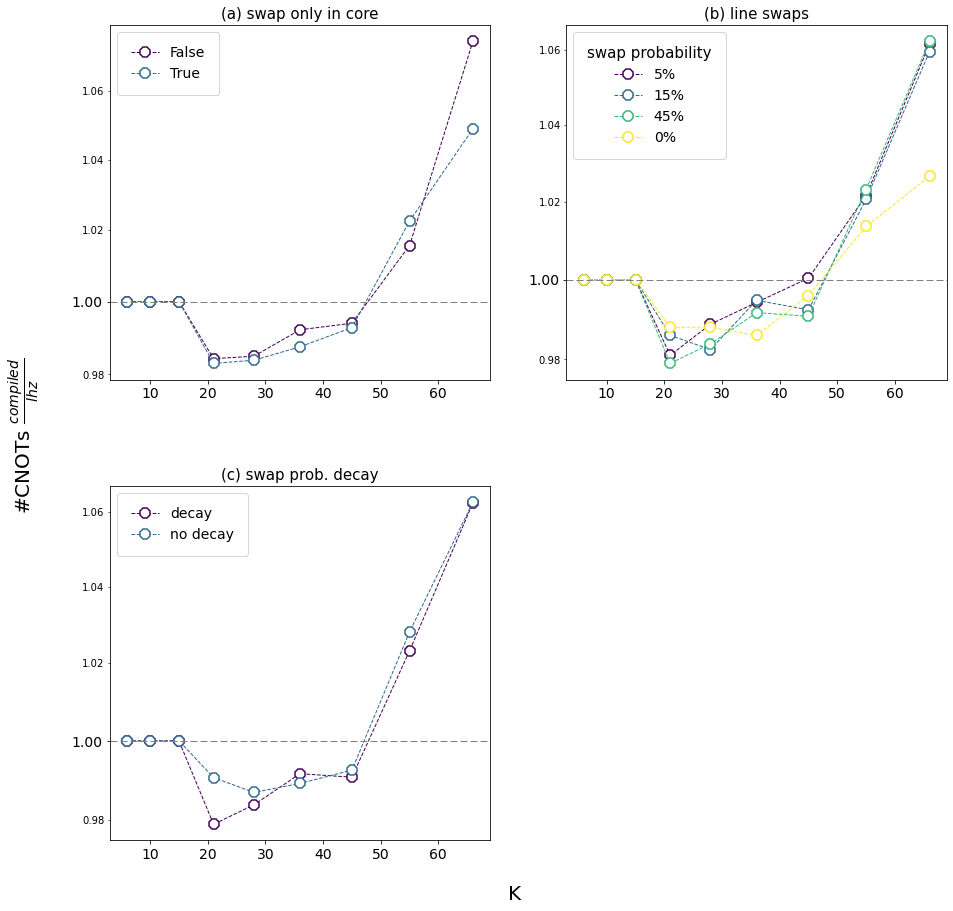

In [18]:
name = "AdvancedMcForLHZGraphsWithCore2"
titles = [
    "(a) swap only in core",
    "(b) line swaps",
    "(c) swap prob. decay",
#     "shell search",
#     "coordinate proposal",
]
all_setting_numbers = [
    [0, 1],
    [2, 3, 4, 8],
    [4, 5],
#     [6, 7, 8],
#     [8, 9, 14],
#     [8, 11, 12, 13, 14],
]
all_setting_names = [
    [[False, True]],
    [["5%", "15%", "45%", "0%"], "swap probability"],
    [["decay", "no decay"]],
#     [[10, 20, 50], "shell time"],
#     [["shell search", "finite grid", "same node"]],
#     [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 15),
    wspace=0.2,
    y_label_coord=(0.03, 0.5),
    x_label_coord=(0.5, 0.07),
    color=colors_viridis(4)
)

axs[1, 1].set_axis_off()
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

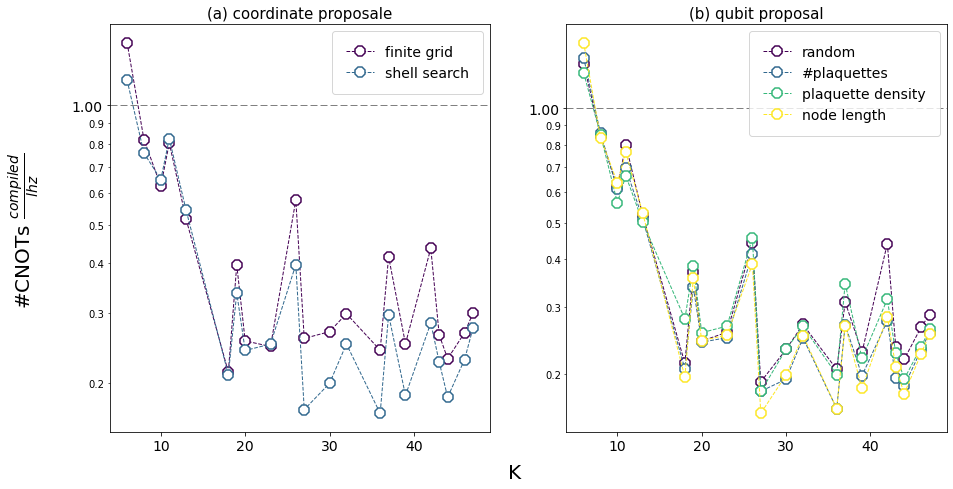

In [19]:
name = "McForDatabase2"
titles = ["(a) coordinate proposale", "(b) qubit proposal"]
all_setting_numbers = [[0, 1], [3, 4, 5, 6]]  # , 7],#, 2, 3],

all_setting_names = [
    [["finite grid", "shell search"]],  # , "same node"]],#, 20, 50]],
    [["random", "#plaquettes", "plaquette density", "node length"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
    color=colors_viridis(4)
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'min indices'
# legend_title = "legend_title"
# setting_numbers = min_indices
# setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

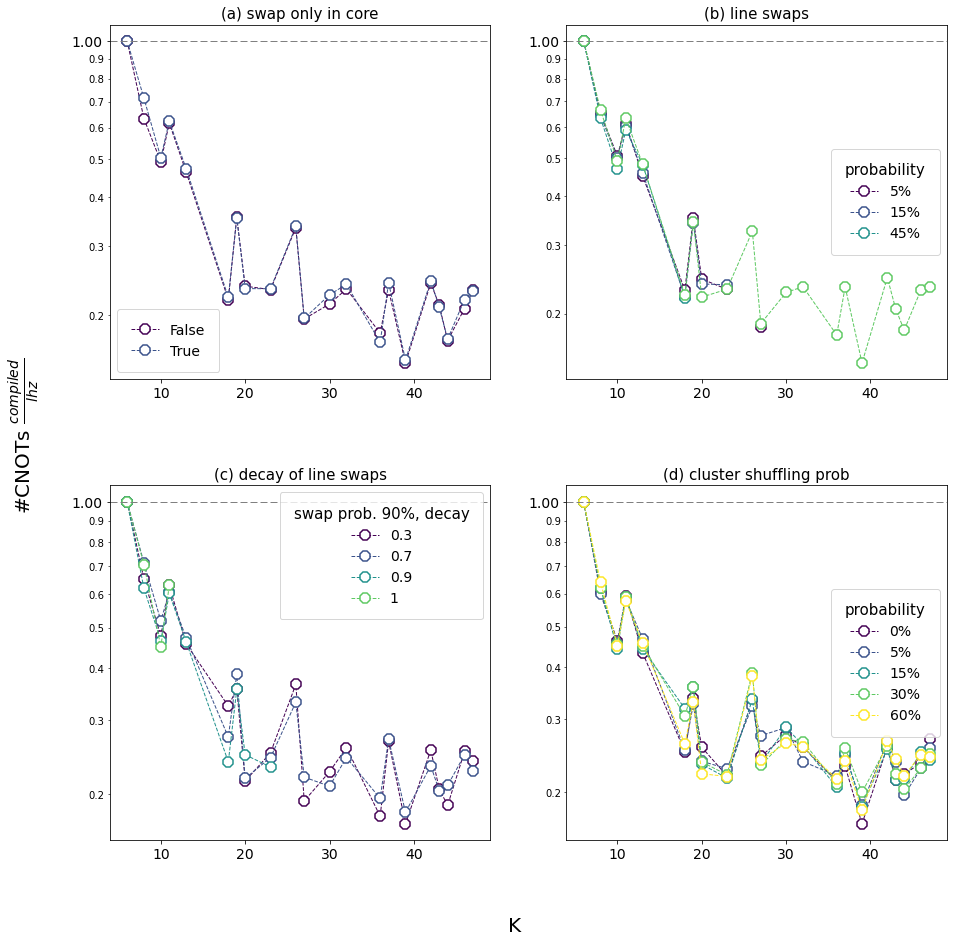

In [20]:
name = "McForDatabaseWithCore2"
titles = [
    "(a) swap only in core",
    "(b) line swaps",
    "(c) decay of line swaps",
]
all_setting_numbers = [
    [0, 1],
    [2, 3, 4, 8],
    [15, 16, 17, 18],
]
all_setting_names = [
    [[False, True], ""],
    [["5%", "15%", "45%"], "probability"],
    [[0.3, 0.7, 0.9, 1], "swap prob. 90%, decay"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df, name, titles, all_setting_numbers_and_names, x_axis, y_axis, nx, ny, color=colors_viridis(5) 
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

name = "CoreMcForDatabase2"

titles = [
    "(d) cluster shuffling prob"
]  # , "ancilla prob, no delition", "ancilla prob, with delition"]
all_setting_numbers = [
    [0, 1, 2, 3, 4]
]  # , [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17]]
all_setting_names = [[["0%", "5%", "15%", "30%", "60%"], "probability"]]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
    axis=axs[1, 1],
    color=colors_viridis(5)
)
name = "McForDatabaseWithCore2"
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

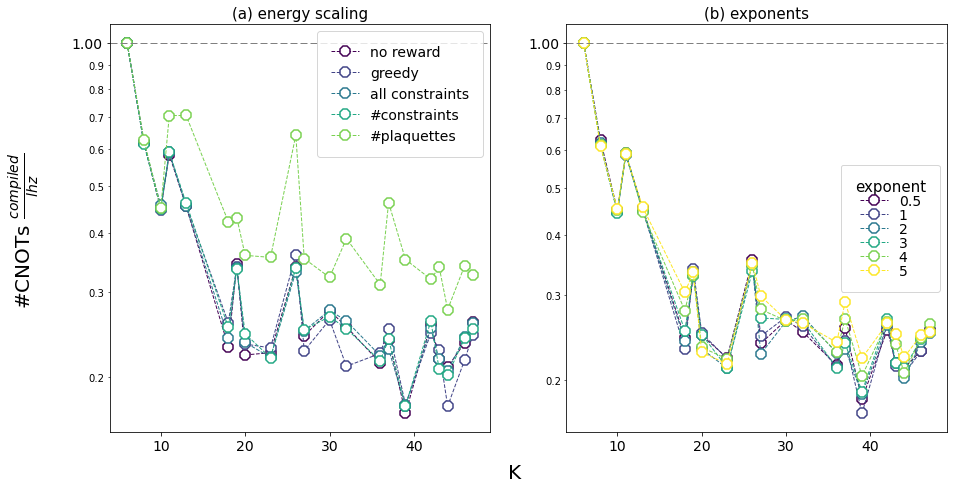

In [21]:
name = "CoreEnergyForDatabase2"
titles = ["(a) energy scaling", "(b) exponents"]
all_setting_numbers = [[0, 1, 2, 3, 4], [7, 8, 9, 10, 11, 12]]

all_setting_names = [
    [["no reward", "greedy", "all constraints", "#constraints", "#plaquettes"]],
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    wspace=0.2,
    color=colors_viridis(6)
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

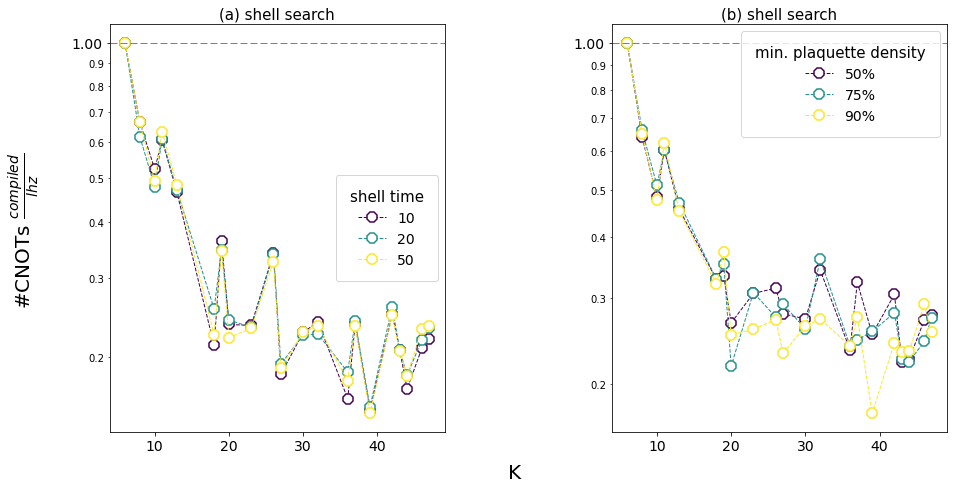

In [22]:
name = "McForDatabaseWithCore2"
titles = ["(a) shell search", "(b) shell search"]
all_setting_numbers = [[6, 7, 8], [22, 23, 24]]
all_setting_names = [
    [[10, 20, 50], "shell time"],
    [["50%", "75%", "90%"], "min. plaquette density"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)

nx, ny = 1, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    figsize=(15, 7.5),
    color=colors_viridis(3)
)
plt.savefig(paths.plots / f"ThesisFigures/Plots/shell_grow.pdf", bbox_inches="tight")

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

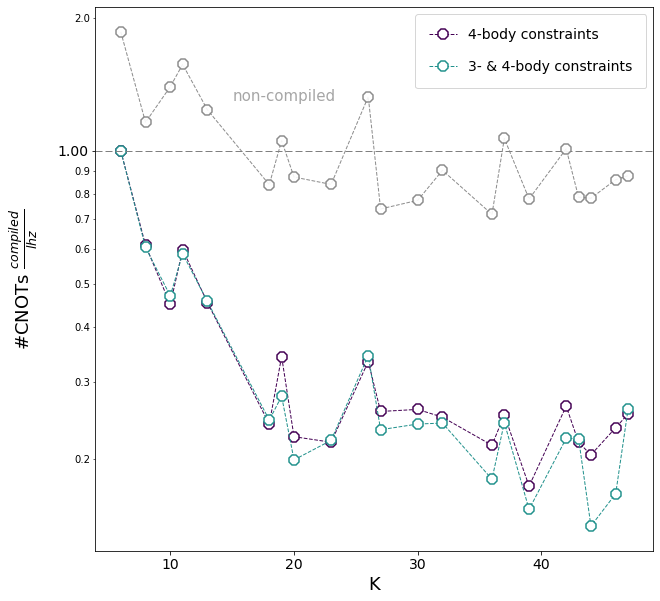

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "only squares"
legend_title = ""
setting_numbers = [5, 6]
setting_names = ["4-body constraints", "3- & 4-body constraints"]
name = "CoreEnergyForDatabase2"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_database=(15, 1.3),
    color=colors_viridis(3),
)

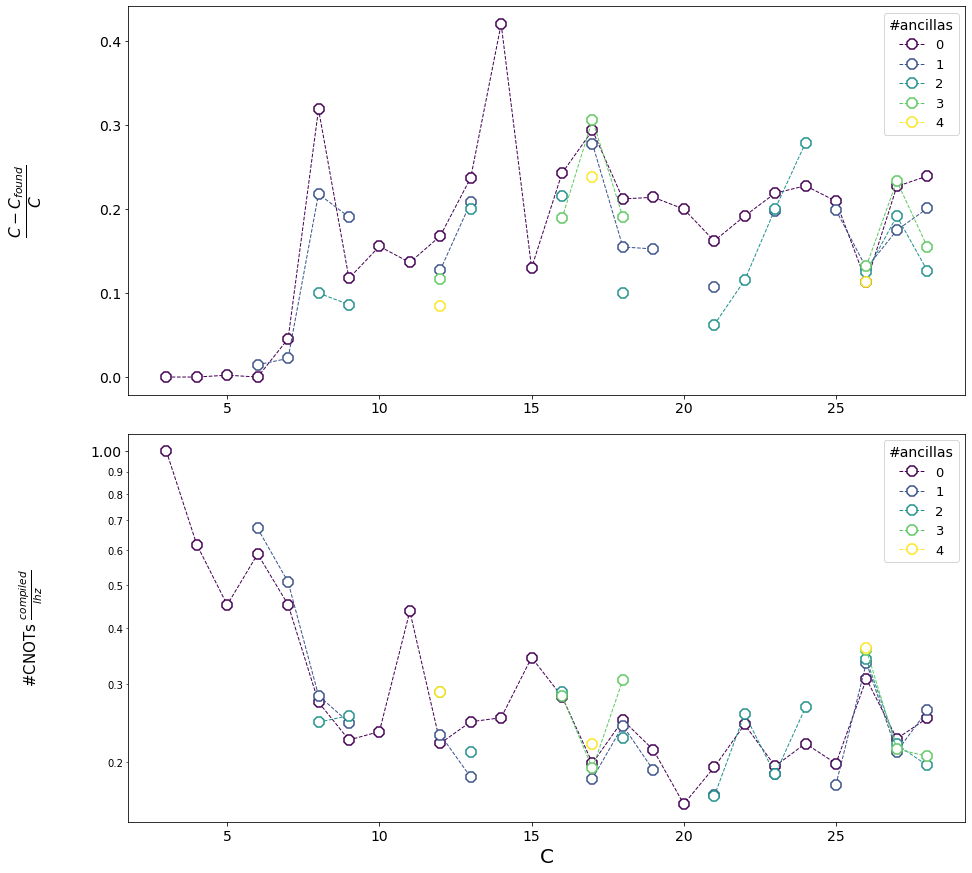

In [24]:

    
    
x_axis = "original_C"
y_axis = "C_density"
df_ = df["CoreMcForDatabase2"][df["CoreMcForDatabase2"].number_of_ancillas < 5]
df_ = df_.groupby([x_axis, "number_of_ancillas"]).mean()
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

ax[0] = (
    df_.reset_index()
    .pivot(x_axis, "number_of_ancillas", y_axis)
    .plot(
        ax=ax[0],
        marker="8",
        linestyle="--",
        lw=1,
        alpha=1,
        grid=False,
        markersize=10,
        markerfacecolor="w",
        markeredgewidth=1.5,
        color=colors_viridis(5),
    )
)
title = "ancillas"
# ax.set_title(label=title, fontsize=15)
ax[0].set_ylabel(r"$\frac{C-C_{found}}{C}$", rotation=90, fontsize=22)
ax[0].yaxis.set_label_coords(-0.1, 0.5)

# ax[0].get_xaxis().set_visible(False)
ax[0].set_xlabel("", fontsize=0)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[0].yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())  # <---- Added
ax[0].legend(title="#ancillas", title_fontsize=14, prop={"size": 13})


x_axis = "original_C"
y_axis = "CNOT_ratio"
df_ = df["CoreMcForDatabase2"][df["CoreMcForDatabase2"].number_of_ancillas < 5]
df_ = df_.groupby([x_axis, "number_of_ancillas"]).mean()


ax[1] = (
    df_.reset_index()
    .pivot(x_axis, "number_of_ancillas", y_axis)
    .plot(
        ax=ax[1],
        marker="8",
        linestyle="--",
        lw=1,
        alpha=1,
        grid=False,
        markersize=10,
        markerfacecolor="w",
        markeredgewidth=1.5,
        color=colors_viridis(5),
    )
)

ax[1].set_xlabel("C", fontsize=20)
# ax.set_xticks([i for i in range(min_x_axis, max_x_axis+1) if i%2==0])
# ax.set_yticks(np.arange(1, 4.2, .8))
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_yscale("log")
#      ax.set_ylim(0, 10)
ax[1].yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())  # <---- Added
ax[1].set_ylabel(r"#CNOTs $\frac{compiled}{lhz}$", rotation=90, fontsize=15)
ax[1].yaxis.set_label_coords(-0.1, 0.5)

ax[1].legend(title="#ancillas", title_fontsize=14, prop={"size": 13})
plt.subplots_adjust(hspace=0.1)
plt.savefig(paths.plots / f"ThesisFigures/Plots/ancillas.pdf", bbox_inches="tight")

In [25]:
# group settings by hand
number = 3
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 0
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 BestSettings3.pkl
BestSettings3.pkl
==========0=============
with_core False
==========1=============
energy.all_constraints True
energy.scaling_model LHZ
==========2=============
with_core False
energy.all_constraints True
energy.scaling_model LHZ
==========3=============
length_of_node_weight 0.1
==========4=============
length_of_node_weight 0.5
==========5=============
length_of_node_weight 0.9


In [26]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

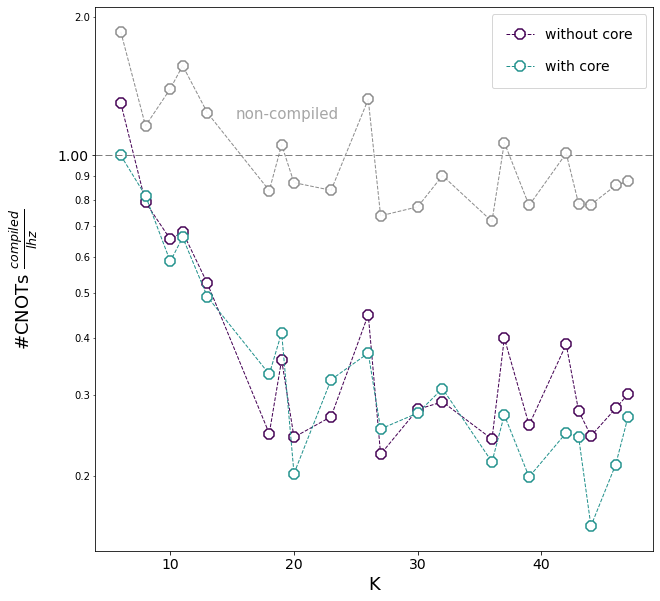

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "core vs no core"
legend_title = ""
setting_numbers = [0, 5]
setting_names = [
    "without core",
    "with core",
]
name = "BestSettings3"
advanced_plot_df(
    df, name, title, setting_names,
    setting_numbers, legend_title,
    x_axis, y_axis, ax, color=colors_viridis(3),
    compare=True,
    default_database=(15.3, 1.2)
)

In [28]:
# group settings by hand
number = 4
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 0
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 EnergyForDatabase4.pkl
EnergyForDatabase4.pkl
==========0=============
energy.polygon_object.scope_measure False
energy.polygon_object.exponent 2
==========1=============
energy.polygon_object.scope_measure True
energy.polygon_object.exponent 2
==========2=============
energy.all_constraints True
energy.scaling_for_plaq3 0
energy.scaling_for_plaq4 0
energy.scaling_model None
==========3=============
energy.all_constraints True
energy.scaling_model LHZ
==========4=============
energy.count_constraints True
energy.scaling_model None
chi_0 0.001


In [29]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

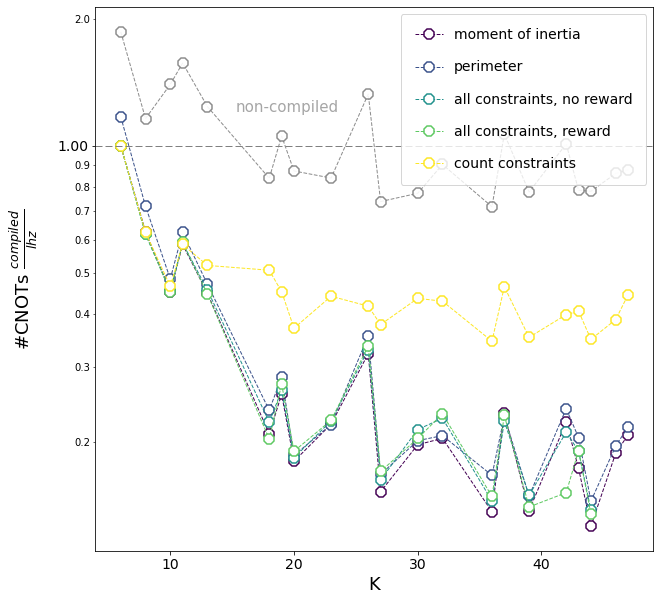

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "energy functions for non complete graphs"
legend_title = ""
setting_numbers = [0, 1, 2, 3, 4, 5]
setting_names = [
    "moment of inertia",
    "perimeter",
    "all constraints, no reward",
    "all constraints, reward",
    "count constraints",
]
name = "EnergyForDatabase4"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    color=colors_viridis(5),
    default_database=(15.3, 1.2)
)

In [31]:
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [32]:
# group settings by hand
results = []
for number in [1, 2, 3, 4]:
    for idx, name in enumerate(
        os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
    ):
        print(idx, name)
        results.append(name.split(".")[0])

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl
0 AdvancedMcForLHZGraphsWithCore2.pkl
1 CoreMcForDatabase2.pkl
2 McForDatabaseWithCore2.pkl
3 EnergyForLHZWithCore2.pkl
4 EnergyForLHZGraphs2.pkl
5 McForDatabase2.pkl
6 CoreEnergyForDatabase2.pkl
0 BestSettings3.pkl
0 EnergyForDatabase4.pkl


In [33]:
df = dict()
for idx, name in enumerate(results):

    number = name[-1]
    dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
    dataframe["run"] = number
    dataframe["setting"] = name
    dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
    dataframe["CNOT_ratio"] = (
        dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
    )
    if name[:-1] in list(df.keys()):
        df[name[:-1]] = df[name[:-1]].append(dataframe)
    else:
        df.update({name[:-1]: dataframe})

In [34]:
dataframe = pd.DataFrame()
for df_ in df.values():
    dataframe = dataframe.append(df_)

In [35]:
dataframe["success"] = (
    100
    * (
        (dataframe.number_of_3er_plaquettes + dataframe.number_of_4er_plaquettes)
        >= 1 * dataframe.C
    )
).to_list()
x_axis = "K"
y_axis = "success"
number_of_settings = dataframe["number_of_setting"].unique()
max_ = 50
dataframe_ = dataframe[dataframe.K < max_]
# complete graphs == 1, else < 1
dataframe_ = dataframe_[dataframe_.qubit_ratio == 1]
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
df_ = df_[df_.groupby(level=[0, 1]).size() > 0]
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
d = df_.reset_index().pivot(x_axis, ["number_of_setting", "setting"], y_axis)
datas_complete = []
for column in d.columns:
    datas_complete.append(d[column].dropna().to_dict())

In [36]:
dataframe["success"] = (
    100
    * (
        (dataframe.number_of_3er_plaquettes + dataframe.number_of_4er_plaquettes)
        >= 1 * dataframe.C
    )
).to_list()
x_axis = "K"
y_axis = "success"
number_of_settings = dataframe["number_of_setting"].unique()
max_ = 50
dataframe_ = dataframe[dataframe.K < max_]
# complete graphs == 1, else < 1
dataframe_ = dataframe_[dataframe_.qubit_ratio < 1]
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
df_ = df_[df_.groupby(level=[0, 1]).size() > 0]
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
d = df_.reset_index().pivot(x_axis, ["number_of_setting", "setting"], y_axis)
datas = []
for column in d.columns:
    datas.append(d[column].dropna().to_dict())

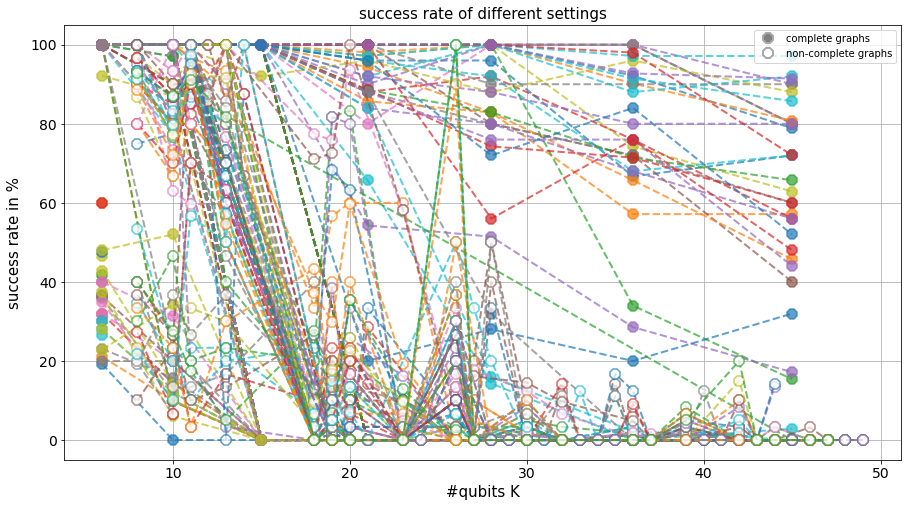

In [37]:
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='8', color='w', label='complete graphs',
          markerfacecolor='grey', markersize=10,markeredgecolor='darkgrey',
          markeredgewidth=2),
    Line2D([0], [0], marker='8', color='w', label='non-complete graphs',
          markerfacecolor='white', markersize=10,markeredgecolor='darkgrey',
          markeredgewidth=2)
                  ]

fig, ax = plt.subplots(figsize=(15, 8))
for data in datas_complete:
    ax.plot(
    data.keys(),
    data.values(),
    marker="8",
    linestyle="--",
    lw=2,
    alpha=0.7,
#    grid=True,
    markersize=10,
    #markerfacecolor="w",
    markeredgewidth=1.5,
#    legend=False,
    )
for data in datas:
    ax.plot(
    data.keys(),
    data.values(),
    marker="8",
    linestyle="--",
    lw=2,
    alpha=0.7,
#    grid=True,
    markersize=10,
    markerfacecolor="w",
    markeredgewidth=1.5,
#    legend=False,
    )

ax.set_ylabel(f"success rate in %", fontsize=15)
title = "success rate of different settings"
ax.set_title(label=title, fontsize=15)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.set_xlabel("#qubits K", fontsize=15)
# ax.set_xticks([i for i in range(4, 21) if i%2==0])
ax.set_yticks([10 * i for i in range(0, 11) if i % 2 == 0])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(handles=legend_elements, loc='best')

plt.grid()
plt.savefig(paths.plots / f"ThesisFigures/Plots/various_settings.pdf", bbox_inches="tight")

SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None
SCALING MODEL None


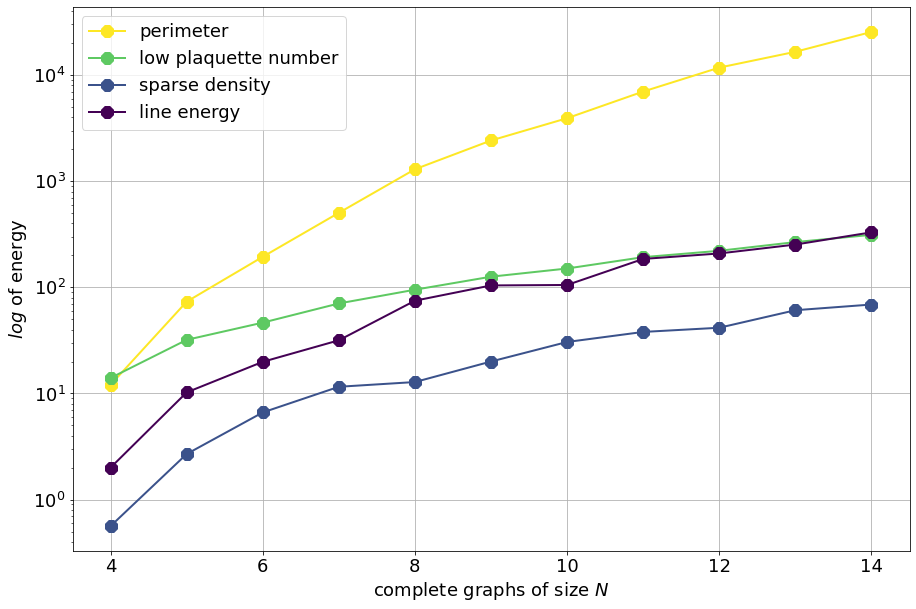

In [38]:
Distances = []
Low_number_of_plaquettes = []
Sparse_density = []
Line_energy_value = []
for _ in range(1):
    distances = []
    low_number_of_plaquettes = []
    sparse_density = []
    line_energy_value = []
    Ns = [i for i in range(4, 15)]
    for N in Ns:
        graph = Graph.complete(N)
        qbits = Qbits.init_qbits_from_dict(graph, dict())#zip(graph.qubits,graph.qubits)))
        nodes_object = Nodes(qbits, place_qbits_in_lines=False)
        polygon_object = Polygons(nodes_object)
        self = Energy(polygon_object)
        polygons_of_interest = self.changed_polygons(qbits)
        self.polygons_coords_of_interest = self.polygon_object.coords_of_polygons(
            polygons_of_interest
        )
        if self.polygon_object.scope_measure:
            measure = self.scopes_of_polygons() 
        if not self.polygon_object.scope_measure:
            measure = self.moments_of_inertia_of_polygons()


        distances_to_plaquette = self.scaled_measure(measure)
        line_energy_value.append(self.line_energy(qbits))
        sparse_density.append(sum(
            self.penalty_for_sparse_plaquette_density()
        ))
        low_number_of_plaquettes.append(sum(
            self.penalty_for_low_number_of_plaquettes()
        ))
        distances.append(distances_to_plaquette.sum())
    Distances.append(distances)
    Low_number_of_plaquettes.append(low_number_of_plaquettes)
    Sparse_density.append(sparse_density)
    Line_energy_value.append(line_energy_value)
    
    
plt.figure(figsize=(15,10))
ms=10
mew=3
lw=2
marker="8"
fillstyle='full'#'none'
for distances in Distances:
    plt.plot(Ns, distances, color="#fde725", marker=marker, markersize=ms,
                 mew=mew,
    linewidth=lw,
    fillstyle=fillstyle,)
for low_number_of_plaquettes in Low_number_of_plaquettes:
    plt.plot(Ns, low_number_of_plaquettes, color="#5ec962", marker=marker, markersize=ms,
                 mew=mew,
    linewidth=lw,
    fillstyle=fillstyle,)
for sparse_density in Sparse_density:
    plt.plot(Ns, sparse_density, color="#3b528b", marker=marker, markersize=ms,
                 mew=mew,
    linewidth=lw,
    fillstyle=fillstyle,)
for line_energy_value in Line_energy_value:
    plt.plot(Ns, line_energy_value, color="#440154", marker=marker, markersize=ms, 
    mew=mew,
    linewidth=lw,
    fillstyle=fillstyle,)
plt.yscale('log')
leg = plt.legend(['perimeter', 'low plaquette number', "sparse density", "line energy"], fontsize=18)
colors=['red', 'blue', 'yellow', 'green']

# for i, j in enumerate(leg.legendHandles):
#     j.set_color(colors[i])
    
plt.xlabel(r'complete graphs of size $N$', fontsize=18)
plt.ylabel(r'$log$ of energy', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(paths.plots / "ThesisFigures/Plots/energie_scalings_in_comparison.pdf", bbox_inches="tight")

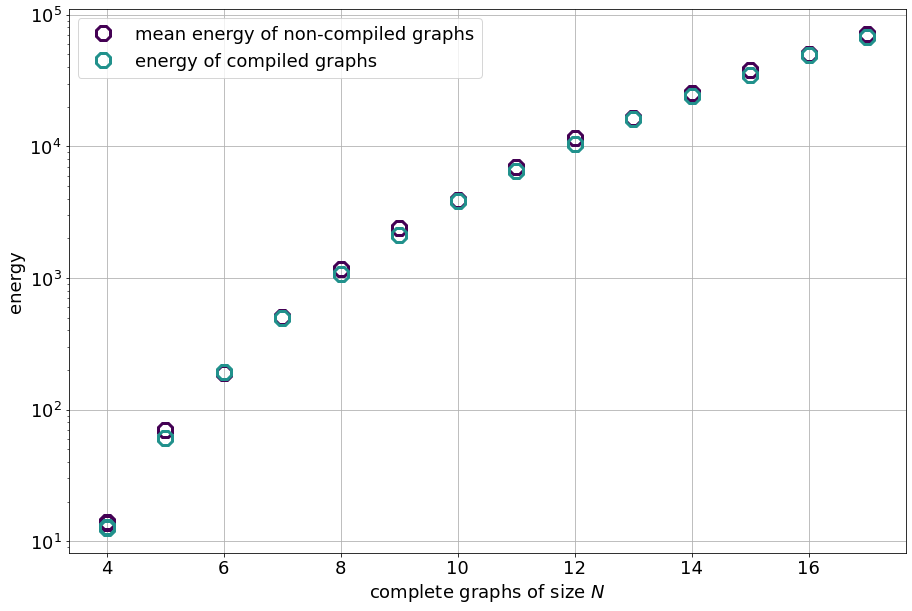

In [39]:
df = pd.read_csv('(non)compiled_energy_of_lhz.csv')
_, ax = plt.subplots(figsize=(15, 10))
ax = df[df.N / 2 * (df.N - 1) == df.K].plot(
    ax=ax,
    x='N',
    y=['mean_energy_of_non_compiled', 'energy_of_compiled'],
    marker='8',
    markersize=15,
    mew=3,
    linewidth=0,
    fillstyle="none",
    color=colors_viridis(3))
#plt.yscale('log')
plt.xlabel(r'complete graphs of size $N$', fontsize=18)
plt.ylabel(r'energy', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale("log")
plt.grid()
leg = plt.legend(["mean energy of non-compiled graphs", "energy of compiled graphs"], fontsize=18)

ax.figure.savefig(paths.plots / "ThesisFigures/Plots/(non)compiled_energy_of_lhz.pdf", bbox_inches="tight")